In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.tabular import *

In [0]:
!pip install kaggle
!mkdir .kaggle

import os
import json 
token = {"username":"hduongck","key":"983e2ab1fbb29cf2734bcbf8811d42fb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

os.makedirs('/data/heart/', exist_ok=True)
os.makedirs('/.kaggle/',exist_ok=True) 
!chmod 600 /content/.kaggle/kaggle.json

!kaggle config set -n path -v{/content/data}


!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d ronitf/heart-disease-uci -p /content/data/heart

In [35]:
#!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          34185  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          51159  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          24525  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          23891  
iarunava/cell-images-for-detecting-malaria                

In [37]:
!unzip /content/data/heart/heart-disease-uci.zip -d data/heart

Archive:  /content/data/heart/heart-disease-uci.zip
  inflating: data/heart/heart.csv    


In [0]:
PATH ='/content/data/heart/'

In [41]:
df = pd.read_csv(f'{PATH}heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Random Forest

In [77]:
! git clone https://github.com/fastai/fastai.git
    
%load /content/fastai/old/fastai/structured.py

fatal: destination path 'fastai' already exists and is not an empty directory.


In [92]:
!python /content/fastai/old/fastai/imports.py
!python /content/fastai/old/fastai/structured.py

Traceback (most recent call last):
  File "/content/fastai/old/fastai/imports.py", line 2, in <module>
    import PIL, os, numpy as np, math, collections, threading, json, bcolz, random, scipy, cv2
ModuleNotFoundError: No module named 'bcolz'
Traceback (most recent call last):
  File "/content/fastai/old/fastai/structured.py", line 1, in <module>
    from .imports import *
ModuleNotFoundError: No module named '__main__.imports'; '__main__' is not a package


Object `structured` not found.


In [87]:
import structured

ModuleNotFoundError: ignored

In [78]:
df_full,y= proc_df(df,'target')

NameError: ignored

# Fastai Deep Learning Tabular



In [46]:
df.shape

(303, 14)

In [0]:
dep_var ='target'
cont_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
procs =[FillMissing,Normalize]

In [0]:
test = TabularList.from_df(df.iloc[240:303].copy(),path=PATH,cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df,path=PATH,cont_names=cont_names,procs=procs)
       .split_by_idx(list(range(240,303)))
       .label_from_df(cols=dep_var)
       .add_test(test)
       .databunch())

In [51]:
data.show_batch(rows=10)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1.0814,0.7256,0.8917,0.5622,1.6854,-0.4123,0.9655,0.2281,-0.5954,-0.8394,0.8705,-0.6130,-0.5497,0
-1.0468,0.7256,0.8917,0.5622,-0.2250,-0.4123,-0.9982,1.2672,-0.5954,-0.8394,0.8705,-0.6130,-0.5497,1
0.0173,0.7256,0.8917,-0.6292,0.2144,-0.4123,-0.9982,-0.2915,-0.5954,-0.4790,-0.7123,-0.6130,1.2332,1
2.1454,-1.3725,-0.0900,-0.6292,0.4245,-0.4123,-0.9982,-1.5194,1.6727,-0.6592,0.8705,0.4158,-0.5497,1
0.2301,0.7256,-0.0900,-0.6292,-0.1295,-0.4123,0.9655,0.7476,-0.5954,-0.8394,-2.2951,-0.6130,-0.5497,1
0.9750,-1.3725,-0.0900,0.5622,-0.9892,-0.4123,0.9655,1.2199,-0.5954,-0.8394,0.8705,1.4446,-0.5497,1
-2.6429,0.7256,-0.0900,-0.0335,-0.8173,-0.4123,-0.9982,2.3062,-0.5954,-0.8394,0.8705,-0.6130,-0.5497,1
0.3365,-1.3725,-1.0717,-0.6292,2.0484,-0.4123,0.9655,0.4642,1.6727,-0.2988,0.8705,-0.6130,-0.5497,1
0.5493,0.7256,-1.0717,0.4431,0.4627,-0.4123,-0.9982,1.3616,-0.5954,-0.8394,0.8705,-0.6130,-0.5497,1
-0.9404,-1.3725,-1.0717,0.4431,-0.2059,-0.4123,-0.9982,-0.0553,1.6727,-0.6592,-0.7123,-0.6130,-0.5497,1


In [0]:
learn = tabular_learner(data,layers=[200,100],metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


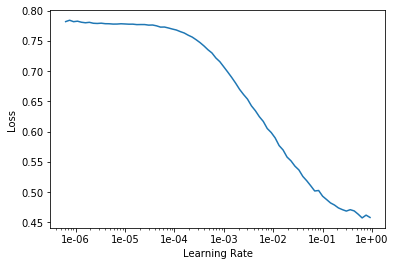

In [65]:
learn.lr_find()
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(5,1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.264045,1.312315,0.507937,00:00
1,0.257065,2.758378,0.380952,00:00
2,0.230251,1.434732,0.682540,00:00
3,0.237787,2.064222,0.412698,00:00
4,0.217068,1.980857,0.444444,00:00


In [0]:
??fit_one_cycle